# Cours05 : Intervalles de confiance et tests d'hypothèses

7 et 14 octobre 2019 (3*1.5h)

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.feature_selection
import sklearn.datasets
import pandas as pd

## Intervalle de confiance

Note préliminaire : c'est l'intervalle qui est alératoire, et non la grandeur sous-jacente qui elle est inconnue.

$$\hat{I} = [\underline{C}, \overline{C}] / P(g \in \hat{I}) = P(\underline{C} \le g \le \overline{C}) \ge 95\%$$

$\hat{I}$ dépend de l'expérience

Dans $P(g \in \hat{I}) \ge 1-\alpha$, c'est $\hat{I}$ la grandeur à estimer, le "sujet"


### Exemple : interval de confiance sur le résultat d'une élection (voir slides)

Pour une probabilité $p$ d'élire un candidat, le but est de trouver une fonction pivotale pour $\hat{p}-p$ qui ne dépend pas de $p$


#### Inégalités de Markov et Tchebyschev

Markov :
$$ Y: \Omega \rightarrow \mathbb{R}^+ $$
$$\forall t > 0, P(Y > t) \le \frac{E(Y)}{t}$$

On retrouve l'inégalité de Tchebyschev avec:
$$ Y = \vert X - E(X) \vert^2 \implies P(\vert X - E(X) \vert^2 > t^2) = P(Y > t^2) \le  \frac{E(Y)}{t^2}$$

Prenons l'estimateur de p: $\hat{p} = \frac 1n \sum_{i=0}^n x_i$ avec $x_i \overset{i.i.d.}{\sim} \mathcal{B}(p) $ (Bernouilli)

$$\begin{align}
Var(\hat{p} &= Var(\frac 1n \sum_{i=0}^n x_i) \\
&\overset{indep}{=} \frac 1n \sum_{i=0}^n Var(X_i) \\
&= \frac{p(1-p)}{n}
\end{align}$$

$$\begin{align}
& P(\vert \hat{p}-p \vert \le \delta) \le \frac{p(1-p)}{n \delta} \le \frac{1}{4n\delta^2} (1) \\
\iff & P(\vert \hat{p}-p \vert > \delta) >  1 - \frac{1}{4n\delta^2} = 1 - \alpha \\
\iff & P(- \delta \le p - \hat{p} \le \delta) > 1 - \alpha (2) \\
\iff & P( \hat{p} - \delta \le p \le \hat{p} + \delta) > 1 - \alpha
\end{align}$$

- (1) : $p(1-p)$ est une parabole inversée de maximum $(\frac 12, \frac14)$
- (2) : par symétrie de l'interval

D'où: $P\left( p \in I=[\hat{p} - \delta , \hat{p} + \delta) ] \right) > 1 - \alpha$

Problème : en utilisant ces inégalités, l'interval est grand (ex élection sur slide)

Propositions d'intervalles de confiance:
- $\hat{I}_0 = [0, 1]$ pas intéressant :-)
- $\hat{I}_1 = [0, \delta]$ = borne supérieure de confiance
- $\hat{I}_2 = [\delta, 1]$ = borne inférieure de confiance


__Rem__: optimalité de l'intervalle si pour $Z \sim f$ sur $\mathbb{R}$, on recherche $J$ un intervalle de longueur min tellque $P(Z \in J) \ge 1 - \alpha$

Si on prend la fonction de densité f(z), $1 - \alpha(u)$ est l'aire sous la courbe de f sur J(u)

$$\begin{align}
1 - \alpha(u) &= P \left( Z \in [J^-(u), J^+(u)] \right)  \\
&= \int_{J(u)} f(z)dz
\end{align}$$

On peut montrer $[J^-(u), J^+(u)]  \in argmin(longueur(J))$ sous contrainte $P(Z \in J(u)) \ge 1 - \alpha(u)$. Mais cette minimisation est difficile à exprimer sans algo de type itératif (Monte Carlo).

Cependant, si la densité est symétrique autour de la moyenne (ex.: Gaussien), on peut utiliser les quantiles symétriques autour de la moyenne $q_{\frac \alpha2}, q_{1 - \frac \alpha2}$

__Exemple :__ intervalle de confiance pour l'espérance de X de loi normale, $\sigma^2$ connu.

$$ X_i \overset{iid}{\sim} \mathcal{N}(\theta, \sigma^2), i=1..n$$

$$ \hat{\theta} = \frac 1n \sum_{i=0}^n X_i $$

$\hat{\theta}$ suit une loi gaussienne car c'est une somme de variables gaussiennes indépendantes de même distribution. Paramètres de la loi : $\hat{\theta} \sim \mathcal{N}(\theta, \frac 1n \sigma^2)$ 

D'où: 
$$\begin{align}
\hat{\theta} - \theta &\sim \mathcal{N}(0, \frac 1n \sigma^2) \\
\sqrt{n} \frac{\hat{\theta} - \theta}{\sigma} &\sim \mathcal{N}(0, 1)
\end{align}$$ 
Fonction pivotale car la loi est indep. de $\theta$, gaussienne centrée)

Les quantiles de $\mathcal{N}(0, 1)$ sont connus :
$$ P\left( Z \in [-1.96, 1.96] \right) = 0.95 = 1 - \alpha $$
$$ P\left( Z \in [-1.64, 1.64] \right) = 0.90 $$

(En R, fonction __qnorm__)

In [2]:
print("Pour la loi normale centrée réduite: ")
for alpha in [0.1, 0.05]:
    boundUp = stats.norm.ppf(1 - (alpha/2))
    verif = stats.norm.cdf(boundUp) - stats.norm.cdf(-boundUp)
    print("- CI @ %.2f = [%.4f, %.4f], verification: P(u in CI) = %.3f" % (alpha, -boundUp, boundUp, verif))

Pour la loi normale centrée réduite: 
- CI @ 0.10 = [-1.6449, 1.6449], verification: P(u in CI) = 0.900
- CI @ 0.05 = [-1.9600, 1.9600], verification: P(u in CI) = 0.950


Voir : https://www.johndcook.com/blog/distributions_scipy/

Avec probabilité $1 - \alpha$, $ -1.96 \le \sqrt{n} \frac{ \theta - \hat{\theta}}{\sigma}  \le 1.96 $

Soit : $ \hat{\theta}-1.96 \frac{\sigma}{\sqrt{n}} \le \theta  \le \hat{\theta} + 1.96 \frac{\sigma}{\sqrt{n}}  $

__Note :__ Quand n augmente, la longueur du CI décroit en $\frac{1}{\sqrt{n}}$

### Théorème central limite (TCL)

$$ \sqrt{n} \frac{\frac 1n \sum_{i=0}^{n} Y_i - \mu}{\sigma} \overset{loi}{\rightarrow} \mathcal{N}(0, 1) $$


C'est une convergence en loi : $ \forall I \subset \mathbb{R}, P(Z_n \in I ) 
\underset{n \rightarrow \infty}{\rightarrow} 
P(Z \in I)$

Avec les variables aléatoires : $ Z_n = \sqrt{n} \frac{\frac 1n \sum_{i=0}^{n} Y_i - \mu}{\sigma} $ Et : $ Z \sim \mathcal{N}(0,1)$

Implique la convergence des fonctions de répartition (Lemme du Porte-manteaux)


Plus généralement : $ Z_n \overset{loi}{\rightarrow} Z $
$$\iff \forall f: \mathbb{R} \rightarrow \mathbb{R}, bornée, continue, E(f(Z_n)) \underset{n \rightarrow \infty}{\rightarrow} E(f(Z)) $$

Conséquences : convergence des histogrammes


#### Intérêt pour l'intervalle de confiance
Soit $ (Y_i)_{i=1..n} \sim P_\theta, \theta \in \Theta$, quelconque

On suppose $ \sigma^2 = Var_\theta(Y_1)$ est connue.

On veut estimer : $\mu = E_\theta(Y_1) = g(\theta) $

On a l'estimateur : $\hat{\mu}(Y_1...Y_n) = \frac 1n \sum_{i=0}^n Y_i$. 

On ne prend pas l'hypothèse gaussienne sur $\hat{\mu}$, mais on a au minimum $E(Y_1^2) < \infty$

TCL : $ \sqrt{n} \frac{\hat{\mu} - \mu}{\sigma} \overset{loi}{\rightarrow} Z, Z \sim \mathcal{N}(0,1) $

__Note:__ la vitesse de convergence dépend des moments

On fait l'approximation : pour tout i fixé: $P(Z_n \in I) \approx P(Z \in I)$, qui est vraie pour $n \rightarrow \infty$

Avec proba $1-\alpha$, si $q_{\frac{\alpha}{2}}, q_{1-\frac{\alpha}{2}}$ sont des quantiles de Z:
$$ P(Z_n \in [q_{\frac{\alpha}{2}}, q_{1 - \frac{\alpha}{2}}] \approx 1 - \alpha $$
$$ P(\mu \in [ \hat{\mu} + \frac{\sigma}{\sqrt{n}} q_{\frac{\alpha}{2}}, \hat{\mu} + \frac{\sigma}{\sqrt{n}} q_{1 - \frac{\alpha}{2}}] \approx 1 - \alpha $$

C'est l'intervalle de confiance asymptotique de niveau de confiance $1-\alpha$

_Note :_ Voir aussi Van de Vaart, chap 1, 2 : Asymptotic statistics

### Lemme de Slutsky

Si : $\begin{cases}
X_n \overset{loi}{\rightarrow} X \\
Y_n \overset{proba}{\rightarrow} C
\end{cases}$
, a priori $C \ne 0$, alors : $X_n Y_n \overset{loi}{\rightarrow} CX$

Convergence en probabilité : $\forall \epsilon > 0 : P(\vert Y - C \vert > \epsilon ) \underset{n \rightarrow \infty}{\rightarrow}  0 $ i.e. : la probabilité est dans un intervalle autour de C

#### Application

$Y_n = \frac{\sigma}{\hat{\sigma}}$, $X_n = \sqrt{n} \frac{\frac 1n \sum_{i=0}^{n} Y_i - \mu}{\sigma}$ 

Si $\hat{\sigma} \overset{proba}{\rightarrow} \sigma$ alors $Y_n \overset{proba}{\rightarrow} 1$

D'où, lemme de Slutsky: $ Y_n X_n = \sqrt{n} \frac{\frac 1n \sum_{i=0}^{n} Y_i - \mu}{\hat{\sigma}} \overset{loi}{\rightarrow} Z $

Donc : on peut remplacer $\sigma$ par $\hat{\sigma} = \frac 1n \sum_{i=0}^{n} \vert Y_i - \overline{Y_n} \vert^2$

Remarque : convergence presque sur $\rightarrow$ convergence en proba en utilisant la loi des grands nombres.

- Si $ E(Y_1) < \infty$, $\overline{Y_n} = \frac 1n \sum_{i=0}^{n} Y_i \overset{p.s.}{\rightarrow} E(Y)$
- Si $ E(\vert Y_1 \vert^2) < \infty$, $\hat{\sigma}^2 \overset{p.s.}{\rightarrow} \sigma^2 = Var(Y)$

__Attention :__ C'est $E(Y^4)$, le moment d'ordre 4 qui règle la vitesse de convergence ! Les estimateurs de la variance sont donc généralement mauvais.

I.C. sur la variance sont en $ O \left( \sqrt{\frac{E\vert Y - E(Y) \vert^2}{n}} \right) =  O \left( \sqrt{\frac{E(Y^4)}{n}} \right) $

(SCHEMA convergence de $\sigma^2$ quand on peut dire qu'elle est fausse, quand on peut dire qu'elle n'est pas impossible)

#### Application à l'exemple des votes

Python depuis les slides :

In [3]:
n = 1000
x = np.random.binomial(1, .55, n)

pchap = np.mean(x)
sigma = np.sqrt(pchap * (1 - pchap))
alpha = .05
q = stats.norm.ppf(1 - alpha/2)
borneinf = pchap - sigma * q / np.sqrt(n)
bornesup = pchap - sigma * (1 - q) / np.sqrt(n)
print('IC sur mu = [%.4f, %.4f ]' % (borneinf , bornesup) )

IC sur mu = [0.5071, 0.5531 ]


## Intervalle de confiance pour les moindres carrés

Retour au fixed design avec $\epsilon \sim \mathcal{N}(0, \sigma Id_n)$

(slides):
$$ T_j = \frac{\hat{\theta_j} - \theta_j}{\hat{\sigma}\sqrt{(X^TX)^{-1}_{j,j}}} \sim \mathcal{T}_{n - rang(X)}$$

La loi de Student à $l$ degré de libertés a une densité proche de $ \frac{1}{1 + t^{l/2}} $. La fonction de répartition complémentaire (1- F(t)) est donc une loi de puissance dont la décroissance est moins rapide que pour la loi gaussienne. Conséquences : les évènements extrêmes sont plus courants, et: $ q_{1 - \frac{\alpha}{2}}^\mathcal{T} > q_{1 - \frac{\alpha}{2}}^\mathcal{N} $

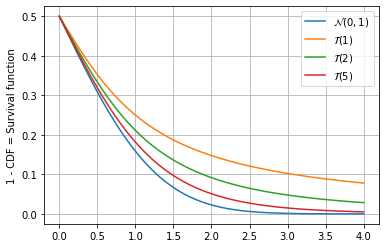

In [4]:
x = np.linspace(0, 4)
plt.plot(x, stats.norm.sf(x))
plt.plot(x, stats.t(1).sf(x))
plt.plot(x, stats.t(2).sf(x))
plt.plot(x, stats.t(5).sf(x))
plt.legend(('$\mathcal{N}(0,1)$', '$\mathcal{T}(1)$', '$\mathcal{T}(2)$', '$\mathcal{T}(5)$'))
plt.ylabel('1 - CDF = Survival function')
plt.grid()

$ Z = \frac{U}{\sqrt{\frac 1l \sum_i v_i^2}} \rightarrow \mathcal{N} $ (Slutsky), Car le dénominateur tend vers une constante

Conclusions:
- Si le rang(X) est proche de n, il faut utiliser les quantiles de Student
- Sinon, quand n est grand, on peut utiliser le TCL et les quantiles de la loi Normale

Prochaine étape : Bootstrap, construction sous hypothèse Gaussienne, dépend donc de n grand

# Tests d'hypothèses

On cherche à tester les hypothèses alternatives $\mathcal{H}_0$ et $\mathcal{H}_1$

Attention cependant : non vraissemblance de $ \mathcal{H}_0$ $\not\implies$ vraissemblance $\mathcal{H}_1$

__Exemple :__ On lance une pièce n fois, on calcul : $\hat{p} = 0.51$ Cela conduit à accepter l'hypothèse $\mathcal{H}_0$ "La pièce est non biaisée".

## Méthode

1. Contruire une statistique de test. Ex.: $T(X_{1..n} = \frac 1n \sum_{i=0}^{n} X_i$
2. On définie des régions d'acceptation $\mathcal{X}_0$, et de rejet $\mathcal{X}_1$ pour $\mathcal{H}_0$ (ne pas utiliser les données pour construire ces régions)
3. Le test est une fonction $\delta : \mathcal{X}^n \rightarrow \{0, 1\}^n$ (sur l'espace de $\mathcal{X}_i$

$$ \delta(X_{1,n} = \begin{cases} &1 si T(x)\in \mathcal{X}_1 \\ &0 si T(x)\in \mathcal{X}_0 \end{cases} $$

$ (\mathcal{X}_0, \mathcal{X}_1)$ est une partition de $\{T(x_{1..n})| x_{1..n} \in \mathcal{X}^n\}$ (image de T)

On cherche à maximiser le risque de 2nd ordre (puissance), tout en gardant le risque de 1er ordre (niveau)


#### Exemple Gaussien

$ Y_i \sim \mathcal{N}(\theta, \sigma)$, variance connue, moyenne inconnue

On définit: $\begin{cases} \mathcal{H}_0 : \theta = 0 \\ \mathcal{H}_1 : \theta \ne 0 \end{cases}$

Voir slides pour l'application avec $\sigma^2 = 1$, sinon renormaliser : 
- Test double bornes : $\delta_1 = 1$ si $T(X) \in R_1 = ]-\infty, -\frac{\sigma}{\sqrt{n}} q_{1 - \frac{\alpha}{2}} ] \cup [\frac{\sigma}{\sqrt{n}} q_{1 - \frac{\alpha}{2}}, \infty [$
- Test simple borne : $\delta_2 = 1$ si $T(X) \in R_2 = [\frac{\sigma}{\sqrt{n}} q_{1 - \alpha}, \infty [$

(SCHEMA simple et double borne)

Les tests $\delta_1$ et $\delta_2$ ont le même niveau, $\alpha$, mais n'ont pas la même "fonction puissance":
$ \beta_{\theta}$

(Reprise le 14 octobre)

### Tester la nullité des coefficients du MCO avec modèle Gaussien

(slides 10-12)

La région de rejet est symmétrique

$$ \vert \hat{\theta}_j \vert \le t_{1 - \frac \alpha2} \hat{\sigma} \sqrt{(X^T X)_{j,j}^{-1} } $$

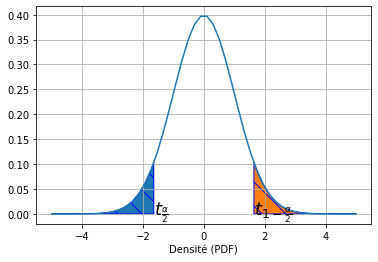

In [50]:
xMax  = 5
x     = np.linspace(-xMax, xMax)
alpha = 0.1
t_halfAlpha = stats.norm.ppf(alpha/2)
x2_1  = np.linspace(-xMax, t_halfAlpha)
x2_2  = np.linspace(-t_halfAlpha, xMax)
plt.plot(x, stats.norm.pdf(x))
plt.fill_between(x2_1, stats.norm.pdf(x2_1), edgecolor='blue', hatch='\\')
plt.fill_between(x2_2, stats.norm.pdf(x2_2), edgecolor='blue', hatch='\\')
plt.text(t_halfAlpha, 0, "$t_{\\frac{\\alpha}{2}}$", fontsize=18)
plt.text(-t_halfAlpha, 0, "$t_{1-\\frac{\\alpha}{2}}$", fontsize=18)
plt.xlabel('Densité (PDF)')
plt.grid()

Relation entre l'intervalle de confiance: la valeur cible $\theta$ doit se trouver dans l'intervalle de confiance établi à partir de $\hat{\theta}$.

Dans l'exemple ci-dessous, $X=0$ appartient à l'I.C.

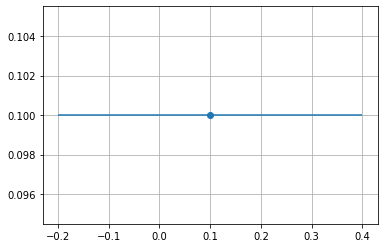

In [49]:
plt.errorbar(0.1, 0.1, xerr=0.3, fmt='o')
plt.grid()

#### p-valeur

C'est la valeur maximum de $\alpha$ telle que $IC_\alpha$ rejette l'hypothèse.

$$ p_{valeur} = max_\alpha P_{H_0}\left(T(X) \ge t(x)\right)$$

### Illustration sur les données "Diabète" (slides 13-18)

- Algo de forward seletion : chaque coef noté $\hat{\beta_k}$ est testé par rapport à l'hypothèse nulle $(\beta_k = 0)$
- Calcul de la statistique de teste et p-valeur pour chaque $\frac{\hat{\beta_k}}{\hat{s_k}}$ => sélection du $\hat{\beta_k}$ avec plus grande t-stat / petite p-valeur
- Itération. En regardant slide 18, on a choisi 7 variables avec p valeurs similaires
- In fine, on refait la régression avec les variables sélectionnées

Note : Stepwise selection according to Wikipedia (https://en.wikipedia.org/wiki/Stepwise_regression)

Voir aussi : 
- LASSO
- Regularisation

Sklearn a une procédure similaire qui sélectionne des variables en fonction du F-score, et la p-valeur. Le résultat ci-dessous sur le dataset Diabètes de Sklearn est un petit peu différent (attention il n'y a pas d'intercept ci-dessous, il y a en a un en #0 sur les slides)

In [60]:
data = sklearn.datasets.load_diabetes()
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [63]:
f, pvalue = sklearn.feature_selection.f_regression(data.data, data.target)

In [84]:
dfRes = pd.DataFrame()
dfRes['F'] = f
dfRes['p-value'] = pvalue
dfRes.sort_values('p-value').head(10)

,F,p-value
2,230.653764,3.466006e-42
8,207.272091,8.823754e-39
3,106.521384,1.648533e-22
7,100.069264,2.304253e-21
6,81.239659,6.162865e-18
9,75.399683,7.580083e-17
4,20.710567,6.920712e-06
0,16.101374,7.055686e-05
5,13.746079,2.359848e-04
1,0.817423,3.664293e-01


# ROC et test d'hypothèses (slides 19-27)

ROC, normalement utilisée en classification.

- Spécificité : $Sp(q) = F(q)$ (1− risque de 1re espèce = Niveau)
- Sensibilité : $Se(q) = 1 − G (q)$ (1− risque de 2nde espèce = Puissance)

- ROC = (1- Sp(q), Se(q))

Soit : $[0,1] \rightarrow [0,1], ROC(t) = 1- G(F^-(1-t))$

### Estimation de ROC 
- Sur données de test ou cross-validation en faisant varier le seuil (ex. : seuil de classification sur sortie de logistic)

Note: Modèle sous-jacent de la p-valeur/t-stat dans les outils ? Généralement gaussien